### Imports

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Constants

In [17]:
basedir = Path("/Users/tusharsingh/Work/Project/tcga-mldl")
plotdir = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/plots")
clinical_file = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/data/clinical.csv")
features = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/data/features.csv")
target = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/data/target.csv")

### Load Data

In [4]:
clinical_df = pd.read_csv(clinical_file)
X = pd.read_csv(features , index_col = 0 )
y = pd.read_csv(target , index_col = 0)

In [5]:
# clinical_df = clinical_df.set_index("Unnamed: 0")
# clinical_df.index.name = "patient_id"
clinical_df.head()
# X = X.set_index("patient_id")

,patient_id,OTHER_PATIENT_ID,PRIMARY_SITE_PATIENT,DISEASE_TYPE,PROJECT_NAME,PROJECT_ID,SEX,RACE,ETHNICITY,VITAL_STATUS,...,MORPHOLOGY,PATH_T_STAGE,PRIOR_TREATMENT,PATH_N_STAGE,PRIOR_MALIGNANCY,PROJECT_STATE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-05-4244,34040b83-7e8a-4264-a551-b16621843e28,Bronchus and lung,Adenomas and Adenocarcinomas,Lung Adenocarcinoma,TCGA-LUAD,Male,NaN,NaN,Alive,...,8140/3,T2,False,N2,False,released,0:LIVING,0.000000,NaN,NaN
1,TCGA-05-4249,4addf05f-3668-4b3f-a17f-c0227329ca52,Bronchus and lung,Adenomas and Adenocarcinomas,Lung Adenocarcinoma,TCGA-LUAD,Male,NaN,NaN,Alive,...,8140/3,T2,False,N0,False,released,0:LIVING,50.032852,NaN,NaN
2,TCGA-05-4250,f98ecd8a-b878-4f53-b911-20cd8e17281c,Bronchus and lung,Adenomas and Adenocarcinomas,Lung Adenocarcinoma,TCGA-LUAD,Female,NaN,NaN,Dead,...,8140/3,T3,False,N1,False,released,1:DECEASED,3.975033,1:Recurred/Progressed,10.980702
3,TCGA-05-4382,3434b91a-c05f-460f-a078-7b1bb6e7085d,Bronchus and lung,Adenomas and Adenocarcinomas,Lung Adenocarcinoma,TCGA-LUAD,Male,NaN,NaN,Alive,...,8255/3,T2,False,N0,True,released,0:LIVING,19.940867,NaN,NaN
4,TCGA-05-4384,9a50e7e4-831d-489f-87d2-979e987561cc,Bronchus and lung,Adenomas and Adenocarcinomas,Lung Adenocarcinoma,TCGA-LUAD,Male,NaN,NaN,Alive,...,8255/3,T2,False,N2,True,released,0:LIVING,13.994744,NaN,NaN


### Checking duplicates

In [6]:
# Check for exact duplicate patient rows
duplicate_rows = X.duplicated()
print(f"Duplicate rows found: {duplicate_rows.sum()}")
# Option: remove them
# merged = merged[~duplicate_rows]
# Duplicate gene names
duplicate_cols = X.columns.duplicated()
print(f"Duplicate columns (genes) found: {duplicate_cols.sum()}")

Duplicate rows found: 0
Duplicate columns (genes) found: 0


#### Checking missing values

In [7]:
# Check total missing values per column
missing_counts = X.isnull().sum()
print(f"Columns -> missing values:\n{missing_counts}")

Columns -> missing values:
1        0
10       0
100      0
1000     0
10000    0
        ..
9992     0
9993     0
9994     0
9995     0
9997     0
Length: 39138, dtype: int64


#### Filtering Genes with Zero Variance 

In [8]:
# Check variance
zero_var_cols = X.var() == 0
print(f"Zero-variance features: {zero_var_cols.sum()}")
# Remove 
X = X.loc[:, ~zero_var_cols]
X.shape

Zero-variance features: 0


(510, 39138)

### Age distribution

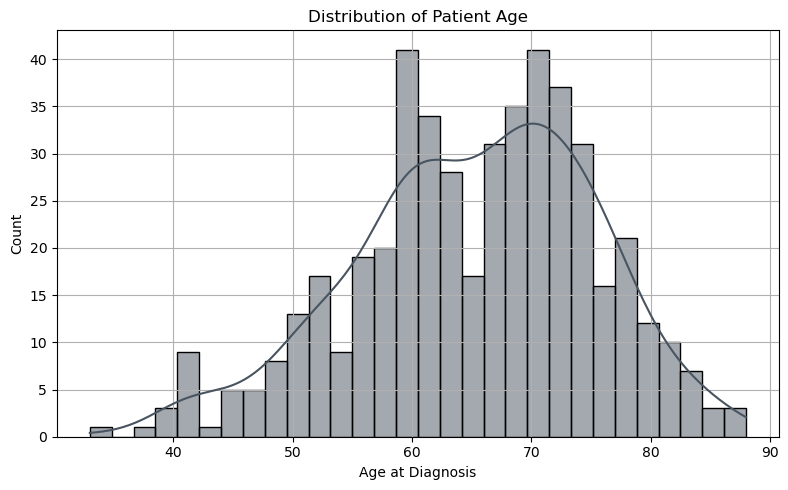

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(clinical_df['AGE'], bins=30, kde=True, color='#485460')
plt.title("Distribution of Patient Age")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.savefig(plotdir/"age_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

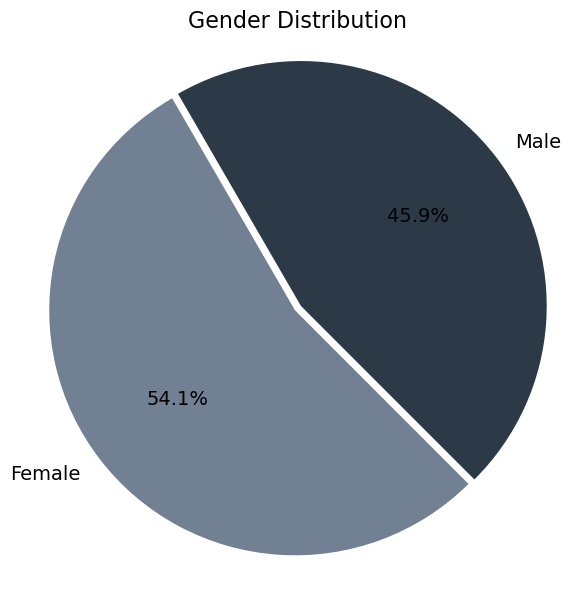

In [38]:
# Count values
gender_counts = clinical_df['SEX'].value_counts(dropna=False)
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=["#718093","#2C3A47"],
    startangle=120,
    textprops={"fontsize":14},
    explode = [0,0.03]
)
plt.title("Gender Distribution" , fontsize= 16 )
plt.axis('equal') 
plt.tight_layout()
plt.savefig(plotdir/"gender_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

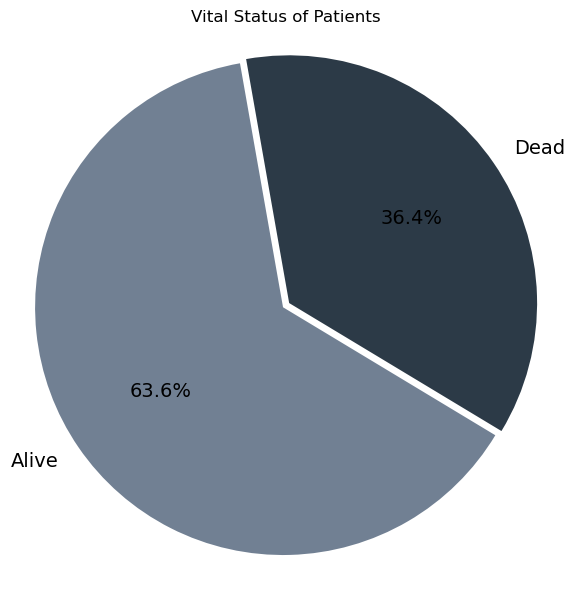

In [39]:
# Count values
vital_counts = clinical_df['VITAL_STATUS'].value_counts(dropna=False)
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    vital_counts,
    labels=vital_counts.index,
    autopct='%1.1f%%',
    colors=["#718093","#2C3A47"],
    startangle=100,
    textprops={"fontsize":14},
    explode = [0,0.03]
)
plt.title("Vital Status of Patients")
plt.axis('equal')
plt.tight_layout()
plt.savefig(plotdir/"Vital_staus.png", bbox_inches="tight", dpi=300)
plt.show()

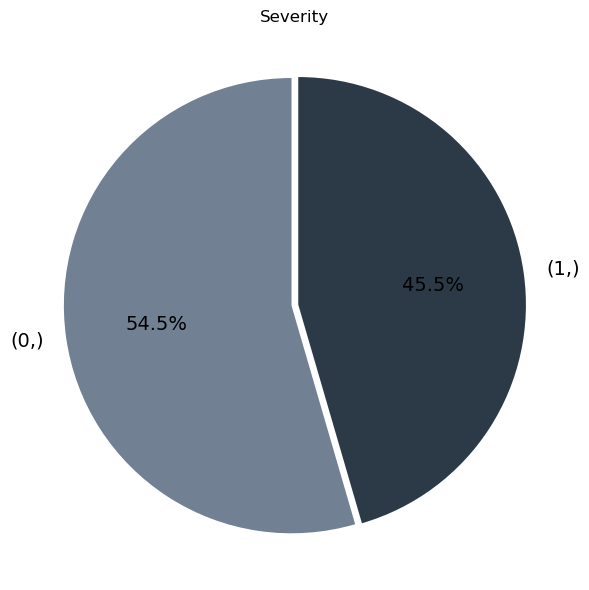

In [40]:
# Count values
severity = y.value_counts(dropna=False)
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    severity,
    labels =severity.index,
    autopct='%1.1f%%',
    colors=["#718093","#2C3A47"],
    startangle=90,
    textprops={"fontsize":14},
    explode = [0,0.03]
)
plt.title("Severity")
plt.axis('equal')
plt.tight_layout()
plt.savefig(plotdir/"severity.png", bbox_inches="tight", dpi=300)
plt.show()

In [13]:
vital_counts

VITAL_STATUS
Alive    323
Dead     185
Name: count, dtype: int64

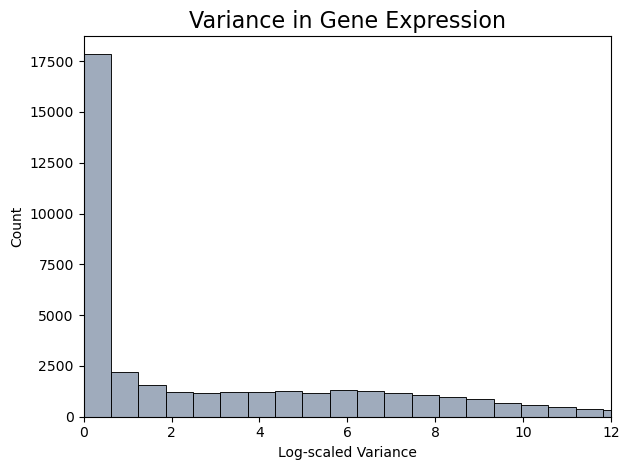

In [42]:
gene_variance = X.var(axis=0)
sns.histplot(x=np.log2(gene_variance+1), bins=50 , color = '#7f8fa6')
plt.xlim(0,12)
plt.title("Variance in Gene Expression", fontsize=16)
plt.xlabel("Log-scaled Variance")
plt.tight_layout()
plt.savefig(plotdir/"Log-scaled_variance.png", bbox_inches="tight", dpi=300)

### Save csv for updated Features

In [15]:
X.to_csv(basedir/"results"/"data"/"features.csv" )